In [143]:
import pandas as pd
from pathlib import Path
from glob import glob

import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.legend import Legend
from matplotlib.lines import Line2D

%matplotlib inline
mpl.rcParams['figure.dpi'] = 200 # bigger figures, yayy!

In [144]:
def plot_orders_parametrized(df, x_var, colored_var, labels=None, xlogscale=True):
    fig, ax = plt.subplots()
    if xlogscale:
        ax.set_xscale('log', basex=10)
    
    x_vals = df[x_var].unique()
    color_vals = df[colored_var].unique()
    
    if labels is not None:
        x_lab = labels[0]
        col_lab = labels[1]
    else:
        x_lab = x_var
        col_lab = colored_var
    
    orders = sorted(df["order"].unique())
    
    omark = []
    oline = []
    colors = plt.cm.viridis(nm.linspace(0, 1, len(color_vals)))
    for di, col_val in enumerate(color_vals):
        order_means = df[(df[colored_var] == col_val)]. \
                      groupby(["expid", "order"])[[x_var, colored_var, "num_order"]].mean().reset_index("expid")
        
        for i in orders:
            omark += ax.plot(order_means.loc[i][x_var], order_means.loc[i]["num_order"], 
                     order_symbols[i], color=colors[di], label="")

            ax.plot(order_means.loc[i][x_var], order_means.loc[i]["num_order"], 
                     color=colors[di], label=col_lab)
        oline += [Line2D([0], [0], color=colors[di])]
            
    omarks = [Line2D([0], [0], marker=order_symbols[o], color="grey") for o in orders]
    lb = Legend(ax, omarks, labels=orders, title="Order")
    ax.add_artist(lb)
    
    
    lb = Legend(ax, oline, labels=color_vals, title=col_lab, borderaxespad=-8.5, loc = "lower center", 
                ncol= len(oline) // 2 if len(oline) > 4 else len(oline))
    ax.add_artist(lb)
    
    ax.set_ylabel("Numerical order")
    ax.set_xlabel(x_lab)
   

In [145]:
def plot_errors_parametric(df, column_var, row_var, colored_var, labels=None):
    columns = df[column_var].unique()
    rows = df[row_var].unique()
    color_vals = df[colored_var].unique()
    
    if labels is not None:
        col_lab = labels[0]
        row_lab = labels[1]
        cor_lab = labels[2]
    else:
        col_lab = column_var
        row_lab = row_var
        cor_lab = colored_var
    
    ncol = len(columns)
    nrow = len(rows)
    
    fig, axs = plt.subplots(nrows=len(rows), ncols=len(columns), figsize=(ncol * 4, nrow * 4))
    if nrow == 1 and ncol == 1:
        axs = [[axs]]
    elif nrow == 1:
        axs = [axs]
    elif ncol == 1:
        axs = [[ax] for ax in axs]
        
    fig.subplots_adjust(hspace=.2, wspace=.2)
    legax = fig.add_axes([0.5, 0.1 - 0.5/(nrow * 4), 0.01, 0.01])
    
    colors = plt.cm.viridis(nm.linspace(0, 1, len(color_vals)))
    legax.set_axis_off()

    for ii, row_val in enumerate(rows):
        for jj, col_val in enumerate(columns):
            ax = axs[ii][jj]
            if jj == 0:
                ax.set_ylabel("$L^2$ error")
            olines = []
            for cc, color_val in enumerate(color_vals):
                ax.set_title("{} = {}, {}: {}".format(row_lab, row_val, col_lab, col_val))
                omarks = plot_errors(df[(df[column_var] == col_val) & 
                               (df[row_var] == row_val) & 
                               (df[colored_var] == color_val)],
                            fig, ax, color=colors[cc], label=" {:.0e}".format(color_val))
                olines += [Line2D([0], [0], color=colors[cc])]
            if ii == len(rows) - 1:
                ax.set_xlabel("$1/h$")
   
    
    fig.legend(handles=omarks, 
               labels=sorted(df["order"].unique()), 
               title="Order", loc='center right')
    
    legax.legend(handles=olines,
                 labels=["{:.0e}".format(cval) for cval in color_vals],
                 title=cor_lab, ncol=4, borderaxespad=0., loc="upper center")
   

In [157]:
order_symbols = dict(zip(nm.arange(0, 6, dtype=float), ["o", "d", "v", "^", "s", "p"]))
# order_symbols = ["$1$", "$2$", "$3$", "$4$", "$5$"]
def plot_errors(df, fig=None, ax=None, **kwargs):
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1)
    # conv_fig.suptitle(fig_sup_title)
    
    if "label" in kwargs:
        label_ext = str(kwargs.pop("label"))
    else:
        label_ext = ""
    
    orders = sorted(df["order"].unique())
    for o in orders:
        ax.set_xscale('log', basex=2)
        ax.set_yscale('log', basey=10)
        curr_df = df[df["order"] == o]
        ax.plot(curr_df["n_cells"], curr_df["diff_l2"], 
                          order_symbols[o], label=str(int(o)) + label_ext, 
                          **kwargs)
        
        ax.plot(curr_df["n_cells"], curr_df["diff_l2"], 
                          label="", **kwargs)

#         for i, r in curr_df.loc[~curr_df["num_order"].isnull(), :].iterrows():
#             ax.text(r["n_cells"], r["diff_l2"], "{:.2f}".format(r["num_order"]))

        ax.grid(True)   
    omarks = [Line2D([0], [0], marker=order_symbols[o], color="grey") for o in orders]
    return omarks

In [158]:
folder = Path(r"soops_tests/example_dg_advection1D/")
df = pd.DataFrame()
for file in folder.glob("*.csv"):
    df = df.append(pd.read_csv(file).assign(expid=file.name.split("r")[0].replace("_", "")))

In [159]:
orders = df["order"].unique()
orders

array([ 0.,  1.,  2.,  3.,  4.])

In [160]:
cgels = df["gel"].unique()
cgels

array(['1_2'], dtype=object)

In [161]:
adfluxes = df["adflux"].unique()
adfluxes

array([ 0. ,  0.5,  1. ])

In [162]:
cfls = df["cfl"].unique()
cfls

array([ 0.1,  0.5])

In [163]:
limits = df["limit"].unique()
limits

array([ True, False], dtype=bool)

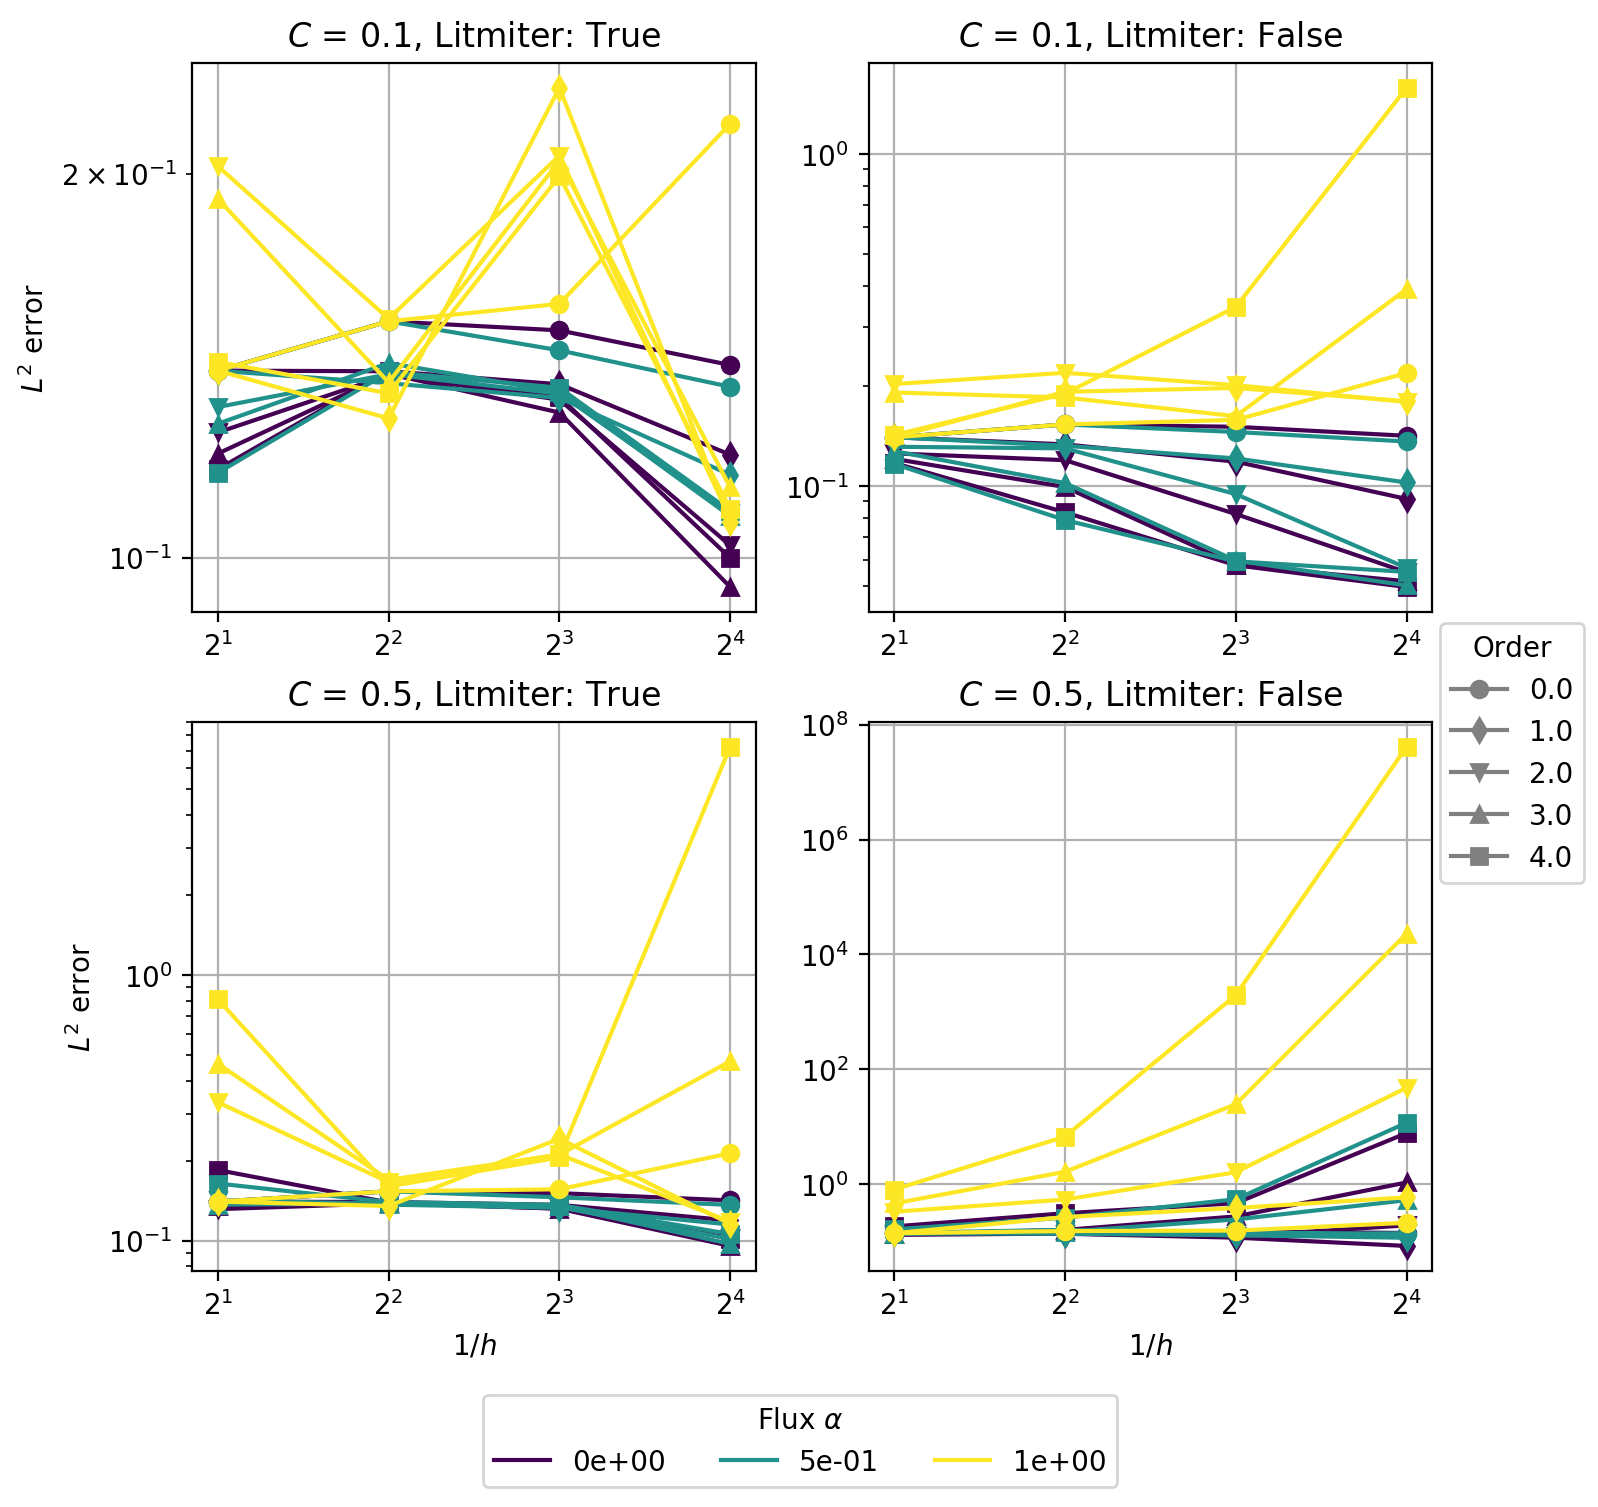

In [165]:
plot_errors_parametric(df[df["flux"] == 0.0], column_var="limit", row_var="cfl", colored_var="adflux", 
                           labels=("Litmiter", "$C$", "Flux $\\alpha$"))

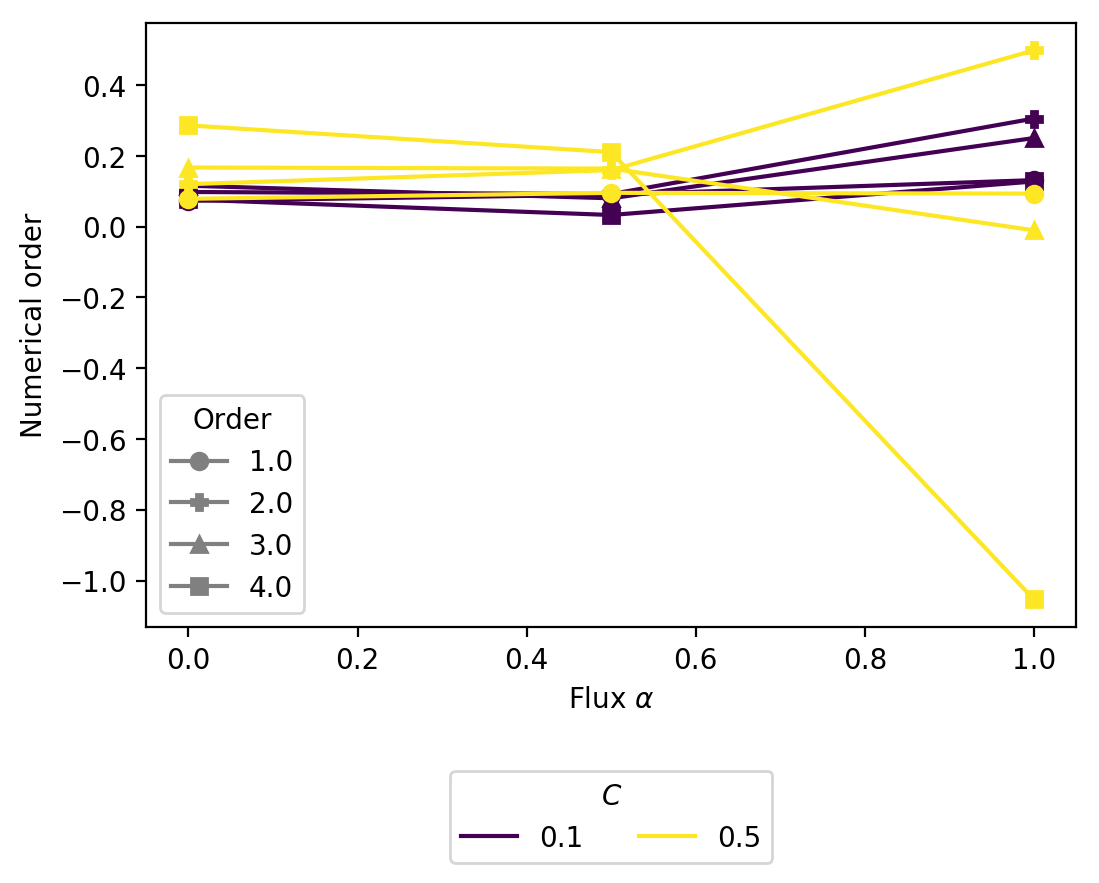

In [125]:
plot_orders_parametrized(df[(df["limit"] == True)], x_var="adflux", colored_var="cfl",
                         labels=("Flux $\\alpha$", "$C$"), xlogscale=False)

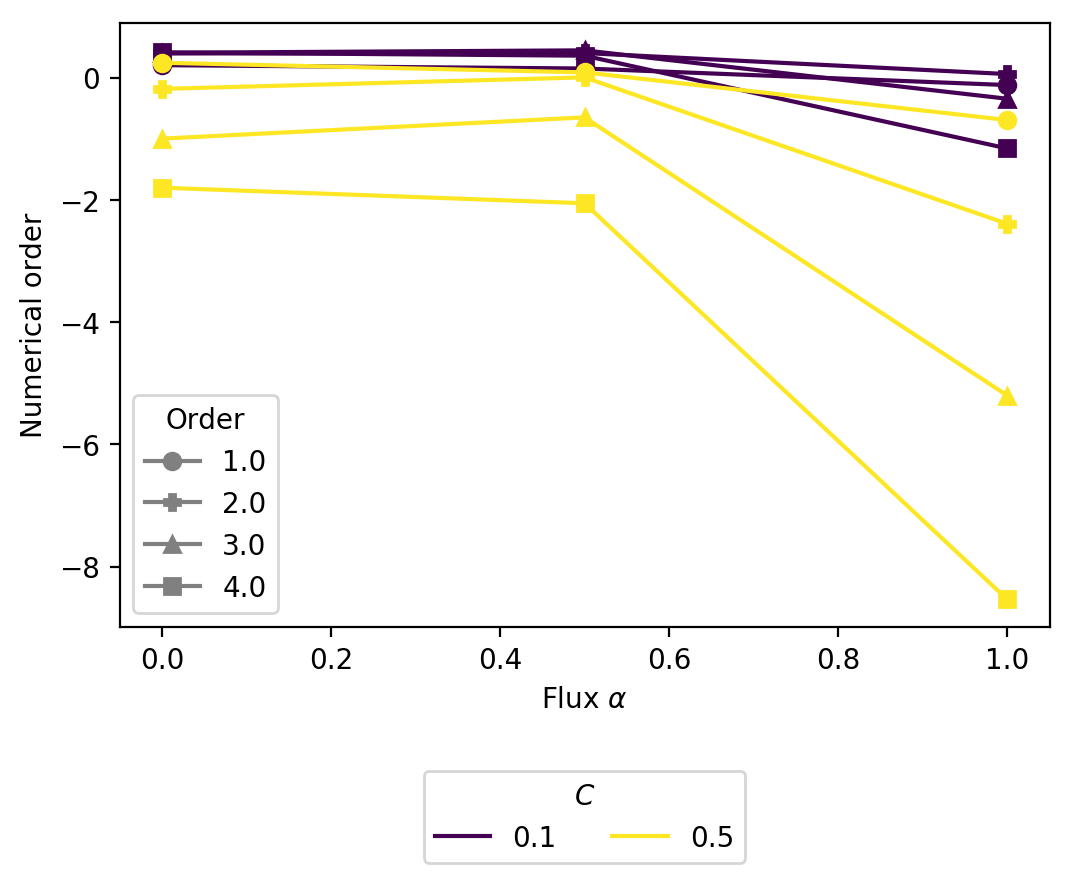

In [126]:
plot_orders_parametrized(df[(df["limit"] == False)], x_var="adflux", colored_var="cfl",
                         labels=("Flux $\\alpha$", "$C$"), xlogscale=False)

In [131]:
df.iloc[0]

Unnamed: 0            0
h                   0.5
n_cells               2
mean_vol            0.5
order                 1
n_dof                 4
ana_l2         0.140132
diff_l2        0.140132
err_rel               1
elapsed        0.323895
cour          0.0333333
actual_dt     0.0166667
num_order           NaN
adflux                0
limit              True
cw                  NaN
diffcoef            NaN
diffscheme    symmetric
cfl                 0.1
dt                  NaN
gel                 1_2
expid            000000
Name: 0, dtype: object

In [ ]:
1/(2*n + 1)